In [1]:
from graphviz import Graph, Digraph

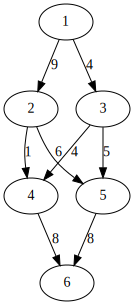

In [48]:
# I use Node class to implement the DFS
class Node:
    visited = set()  # class variable
    def __init__(self, name):
        self.name = name
        self.children = []  # store the children node object
        self.childrenNames = {} # store the children name and edge cost from self to this child
    
    def __repr__(self):
        return "node %s" % self.name
  
    def findPath(self, dst):  #dst: the name of final destination(t), is a string
        #print("node {}, its chilren are{}".format(self,self.children))
        '''
        find path from current Node to final destination, use DFS
        @Input: destination node
        @Output: a list containing node names, reversed path from destination to current node
        retutn the reversed path to save some complexity(prepend list is O(N), 
        append list is O(1))
        '''
        if self.name in Node.visited: # run into a circle, return empty path
            return []
        
        Node.visited.add(self.name)

        if self.name == dst:
            return [self.name]

        if len(self.children) == 0: # run into node without children
            return []

        for child in self.children:
            path = child.findPath(dst)
            #print("Now we into node {}, the path is {}".format(self.name, path))
            if(len(path) > 0):
                path.append(self.name)
                return path
        return []
        

class graph:
    
    def __init__(self):
        self.nodes = {} # a dic storing all nodes, key is name(string), val is node object
    
    def addNode(self, name):
        self.nodes[name] = Node(name)
    
    # cumulative edge capacity if we have add (u,v,w) where e,v exist
    def add_edge(self, u, v, w): # direct edge from u to v with cpacity w
        '''
        add edge to my graph
        Input:
        u: string represent u name,  v same
        w: int represent capacity
        '''
        if w<0:
            raise ValueError("No negative edge cost! Check your input!")
            
        for name in [u,v]:
            if not name in self.nodes:
                self.addNode(name)
            
        # if we do not add v to u's children, add now
        if not self.nodes[v] in self.nodes[u].children and w > 0:
            self.nodes[u].children.append(self.nodes[v])
        

        # parallel dic store the cost from u to v, also including update costs
        if v in self.nodes[u].childrenNames:
            self.nodes[u].childrenNames[v] += w
        else:
            self.nodes[u].childrenNames[v] = w
    
    def edge(self, u, v, w): # direct edge from u to v with cpacity w
        '''
        add edge to my graph
        Input:
        u: string represent u name,  v same
        w: int represent capacity
        '''
        if w<0:
            raise ValueError("No negative edge cost! Check your input!")
            
        for name in [u,v]:
            if not name in self.nodes:
                self.addNode(name)
            
        # if we do not add v to u's children, add now
        if not self.nodes[v] in self.nodes[u].children and w > 0:
            self.nodes[u].children.append(self.nodes[v])
        
        # if we add some edge from u to v previously, but
        # w is 0 after updating the residual graph, (no edge from u to v now), remove edge
        # i.e. remove v from u's children
        if self.nodes[v] in self.nodes[u].children and w == 0:
            self.nodes[u].children.remove(self.nodes[v])
        # parallel dic store the cost from u to v, also including update costs
        self.nodes[u].childrenNames[v] = w
    
    def _repr_svg_(self):
        g = Digraph()
        for n in self.nodes:
            g.node(n)
            for child in self.nodes[n].children:
                g.edge(n, child.name, label = str(self.nodes[n].childrenNames[child.name]))
        return g._repr_svg_()
    

    def DFS(self, s, t):
        '''
        find path from s to t
        s: source node
        t: final destination
        return a list path storing the name(string) of nodes along the path
        '''
        Node.visited = set() # clear up visited set before each DFS
        reversedPath = self.nodes[s].findPath(t)

        #print("we want to find from {} to {} now".format(s,t))
        #print(reversedPath)
        return [i for i in reversed(reversedPath)]
    
    def FordFulkerson(self, s, t):
        gList = []
        '''
        greedy method for finding max flow
        input: s source node, t destination node
        '''
        if s==t:
            raise ValueError("Error! Source and sink is the same node!")
        maxFlow = 0
        while True: 
            path = self.DFS(s, t)
            #print("The path is {}".format(path))
            if len(path) == 0:
                break

            # while we can still find flow from s to t, an augmenting path P from s to t
            bottleNeck = float("Inf") # find bottleNeck(P,Gf)
            for i in range(len(path)-1):
                # path[i] is string
                # the edge is path[i] and one of its children path[i+1]
                # the edge cost of edge (path[i], path[i+1]) is self.nodes[path[i]].childrenNames[path[i+1]]
                if self.nodes[path[i]].childrenNames[path[i+1]] < bottleNeck:
                    bottleNeck = self.nodes[path[i]].childrenNames[path[i+1]]
            # now find the bottleNeck of current residual graph
            print("The path is {}, the bottle neck is {}".format(path, bottleNeck))
            
            if bottleNeck <= 0:
                raise ValueError("Non-posotive bottle neck! Check your computation!")
            maxFlow += bottleNeck

            # now update residual capacities of the edges and reverse edges
            # along the path
            for j in range(len(path)-1):
                w = self.nodes[path[j]].childrenNames[path[j+1]]
                self.edge(path[j], path[j+1], w - bottleNeck) 

                # check whether path[j+1] is children of path[j] (main check in childrenNames incase 
                # trying to find non existing key in dic)
                if path[j] in self.nodes[path[j+1]].childrenNames:
                    reverseFlow = bottleNeck + self.nodes[path[j+1]].childrenNames[path[j]]
                else:
                    reverseFlow = bottleNeck
                
                self.edge(path[j+1], path[j], reverseFlow)
                
            
            
            

        return maxFlow





g = graph()
g.add_edge("1", "2",9)
g.add_edge("1", "3",4)
g.add_edge("2", "4",1)
g.add_edge("2", "5",6)
g.add_edge("3", "4",4)
g.add_edge("3", "5",5)
g.add_edge("4", "6",8)
g.add_edge("5", "6",5)
g.add_edge("5", "6",3)






g

In [49]:
maxflow = g.FordFulkerson("1","6")

The path is ['1', '2', '4', '6'], the bottle neck is 1
The path is ['1', '2', '5', '6'], the bottle neck is 6
The path is ['1', '3', '4', '6'], the bottle neck is 4


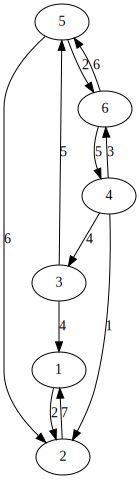

In [50]:
g

In [43]:
maxflow

8